## Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/Assignment 3 Case Study 1 - Retail Case Study/Customer.csv')
hierarchy = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/Assignment 3 Case Study 1 - Retail Case Study/prod_cat_info.csv')
transactions = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/Assignment 3 Case Study 1 - Retail Case Study/Transactions.csv')


print(hierarchy)
print(transactions)
print(customer)

    prod_cat_code          prod_cat  prod_sub_cat_code          prod_subcat
0               1          Clothing                  4                 Mens
1               1          Clothing                  1                Women
2               1          Clothing                  3                 Kids
3               2          Footwear                  1                 Mens
4               2          Footwear                  3                Women
5               2          Footwear                  4                 Kids
6               3       Electronics                  4              Mobiles
7               3       Electronics                  5            Computers
8               3       Electronics                  8  Personal Appliances
9               3       Electronics                  9              Cameras
10              3       Electronics                 10      Audio and video
11              4              Bags                  1                 Mens
12          

In [3]:
transactions = transactions.rename(columns={'prod_subcat_code':'prod_sub_cat_code'})

In [4]:
Customerdata = pd.merge(transactions, hierarchy, how='left', left_on=['prod_cat_code','prod_sub_cat_code'], right_on=['prod_cat_code','prod_sub_cat_code'])
Customerdata

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [5]:
Customer_Final = pd.merge(Customerdata, customer, how='left', left_on='cust_id', right_on='customer_Id').drop('customer_Id', axis=1)
Customer_Final

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


## Q2: Prepare a summary report for the merged data set.

In [6]:
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)

def summary_rep(df):

    print('Column names and their corresponding Data Types')
    print(df.info())
    print('Top 10 Observations')
    print(df.head(10))
    print('Five-number summary for continuous columns')
    print(df.select_dtypes('int').describe())
    print('Frequency Tables for Categorical Columns')
    for column in df.select_dtypes(include=['object']).columns:
        display(pd.crosstab(index=df[column], columns='Number of observations'))

summary_rep(Customer_Final)

/var/folders/4k/94mrg8ls5sn8rvlmp_20rcqh0000gn/T/ipykernel_13757/2203275638.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
/var/folders/4k/94mrg8ls5sn8rvlmp_20rcqh0000gn/T/ipykernel_13757/2203275638.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)


Column names and their corresponding Data Types
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_sub_cat_code  23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_cat           23053 non-null  object        
 11  prod_subcat        23053 non-null  object        
 12  DOB                23053 non-null  datetime64[ns]
 13  Gender       

col_0,Number of observations
Store_type,
Flagship store,4577
MBR,4661
TeleShop,4504
e-Shop,9311


col_0,Number of observations
prod_cat,
Bags,1998
Books,6069
Clothing,2960
Electronics,4898
Footwear,2999
Home and kitchen,4129


col_0,Number of observations
prod_subcat,
Academic,967
Audio and video,952
Bath,1023
Cameras,985
Children,1035
Comics,1031
Computers,958
DIY,989
Fiction,1043


col_0,Number of observations
Gender,
F,11233
M,11811


In [8]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_sub_cat_code  23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_cat           23053 non-null  object        
 11  prod_subcat        23053 non-null  object        
 12  DOB                23053 non-null  datetime64[ns]
 13  Gender             23044 non-null  object        
 14  city_c

## Q3. Generate histograms for all continuous variables and frequency bars for categorical variables.

[Text(0.5, 80.7222222222222, 'Gender Frequencies')]

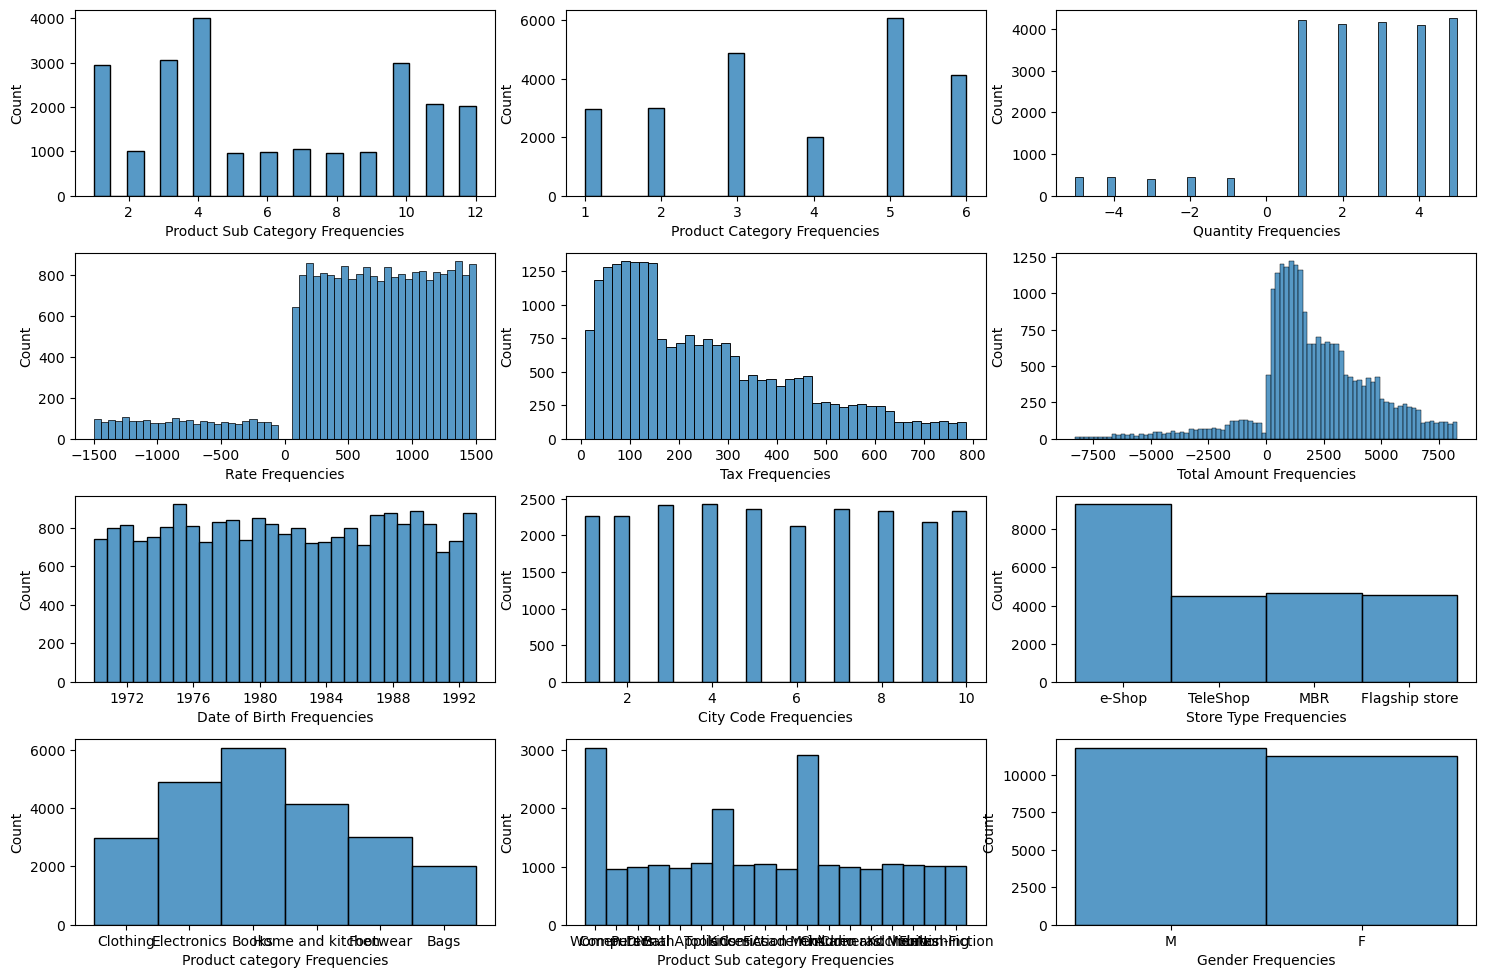

In [7]:
figure, axis = plt.subplots(4,3, figsize=[15,10])
figure.tight_layout(pad=2)
sns.histplot(Customer_Final.prod_sub_cat_code, ax=axis[0,0]).set(xlabel='Product Sub Category Frequencies')
sns.histplot(Customer_Final.prod_cat_code, ax=axis[0,1]).set(xlabel='Product Category Frequencies')
sns.histplot(Customer_Final.Qty, ax=axis[0,2]).set(xlabel='Quantity Frequencies')
sns.histplot(Customer_Final.Rate, ax=axis[1,0]).set(xlabel='Rate Frequencies')
sns.histplot(Customer_Final.Tax, ax=axis[1,1]).set(xlabel='Tax Frequencies')
sns.histplot(Customer_Final.total_amt, ax=axis[1,2]).set(xlabel='Total Amount Frequencies')
sns.histplot(Customer_Final.DOB, ax=axis[2,0]).set(xlabel='Date of Birth Frequencies')
sns.histplot(Customer_Final.city_code, ax=axis[2,1]).set(xlabel='City Code Frequencies')
sns.histplot(Customer_Final.Store_type.value_counts(), ax=axis[2,2], x=Customer_Final.Store_type).set(xlabel='Store Type Frequencies')
sns.histplot(Customer_Final.prod_cat.value_counts(), ax=axis[3,0], x=Customer_Final.prod_cat).set(xlabel='Product category Frequencies')
sns.histplot(Customer_Final.prod_subcat.value_counts(), ax=axis[3,1], x=Customer_Final.prod_subcat).set(xlabel='Product Sub category Frequencies')
sns.histplot(Customer_Final.Gender.value_counts(), ax=axis[3,2], x=Customer_Final.Gender).set(xlabel='Gender Frequencies')

## Q4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data
### b. Count of transactions where the total amount of transaction was negative

In [8]:
timeperiod = Customer_Final.tran_date.max() - Customer_Final.tran_date.min()
print('Time Period of available transaction data is ', timeperiod)

print('Number of Transactions with negative Total amount values ',Customer_Final[Customer_Final.total_amt < 0].shape[0])

Time Period of aailable transaction data is  1430 days 00:00:00
Number of Transactions with negative Total amount values  2177


## Q5. Analyze which product categories are more popular among females vs male customers.

In [9]:
female_favcat = pd.crosstab(Customer_Final.prod_cat, Customer_Final.Gender).sort_values(by='M',ascending=False).head(3).drop('F', axis=1)
print(female_favcat)
print(' Favorite Female Categories are',list(female_favcat.index))
#print('Top 3 Most Popular Product Categories Among females are ', )
male_favcat = pd.crosstab(Customer_Final.prod_cat, Customer_Final.Gender).sort_values(by='F',ascending=False).head(3).drop('M', axis=1)
print(male_favcat)
print(' Favorite Male Categories are',list(male_favcat.index))

##print('Most Popular C')

Gender               M
prod_cat              
Books             3116
Electronics       2570
Home and kitchen  2134
 Favorite Female Categories are ['Books', 'Electronics', 'Home and kitchen']
Gender               F
prod_cat              
Books             2949
Electronics       2328
Home and kitchen  1994
 Favorite Male Categories are ['Books', 'Electronics', 'Home and kitchen']


## Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [10]:
city_cust_count = Customer_Final.groupby('city_code')['cust_id'].count().sort_values(ascending=False)
print(f'There are maximumnumber of customers in city code {city_cust_count.index[0]}')

cust_total = city_cust_count.sum()

cust_perc = city_cust_count.max()/cust_total*100
print(f'Percentage of customers in city code {city_cust_count.index[0]} is {cust_perc}')


There are maximumnumber of customers in city code 4.0
Percentage of customers in city code 4.0 is 10.509871989585594


## Q7. Which store type sells the maximum products by value and by quantity?

In [67]:
## Converting negative values to positive values
Customer_Final['Qty_pos'] = pd.Series(np.where(Customer_Final.Qty<0, Customer_Final.Qty*-1, Customer_Final.Qty))
Customer_Final['Rate_pos'] = pd.Series(np.where(Customer_Final.Rate<0, Customer_Final.Rate*-1, Customer_Final.Rate))
Customer_Final['total_amt_pos'] = pd.Series(np.where(Customer_Final.total_amt<0, Customer_Final.total_amt*-1, Customer_Final.total_amt))

store_max_qty = Customer_Final.groupby('Store_type')['Qty'].sum().sort_values(ascending=False).index[0]
store_max_value = Customer_Final.groupby('Store_type')['Rate'].sum().sort_values(ascending=False).index[0]

print(f'{store_max_qty} sells the maximum products by quantity and {store_max_value} sells the maximum products by value')


e-Shop sells the maximum products by quantity and e-Shop sells the maximum products by value


## Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [68]:
Customer_Final.pivot_table(index='prod_cat', values='total_amt_pos', columns='Store_type', aggfunc='sum')

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,1052354.485,1117741.755,1027419.055,2044836.755
Books,3151422.430,3236974.845,3007173.520,6551338.365
Clothing,1533465.960,1644870.955,1595964.760,3123555.435
Electronics,2759883.360,2492611.485,2391780.235,5320213.665
Footwear,1522150.760,1488588.595,1540208.670,3178517.030
Home and kitchen,2078274.055,2161799.900,1978910.245,4327942.450


In [13]:
print('Total Amount earned from Electronics Category from Flagship Stores is 2215136.04 and from Clothing Category is 1194423.23')

Total Amount earned from Electronics Category from Flagship Stores is 2215136.04 and from Clothing Category is 1194423.23


## Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [69]:
male_elec_sale = np.where((Customer_Final.Gender=='M') & (Customer_Final.prod_cat=='Electronics'), Customer_Final.total_amt_pos, 0).sum()
print(f'Total Sales by Male Customers in Electronics Category is {male_elec_sale}')

Total Sales by Male Customers in Electronics Category is 6927597.494999999


## Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [36]:
data_positive = Customer_Final[Customer_Final.Qty>0]
cust_list2 = list(data_positive.groupby('cust_id')['transaction_id'].count()[data_positive.groupby('cust_id')['transaction_id'].count()>10].index)

print(f'List of customer Ids with more than 10 transactions is {cust_list2}')

List of customer Ids with more than 10 transactions is [266794, 270535, 270803, 272741, 273014, 274227]


## Q11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?
### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [72]:
cust_agelim = Customer_Final[((pd.Timestamp.now() - Customer_Final.DOB).dt.days>=365*25) & ((pd.Timestamp.now() - Customer_Final.DOB).dt.days<=365*35)]

cust_agelim.groupby('prod_cat')['total_amt_pos'].sum()

total_amt_elec = round(cust_agelim.groupby('prod_cat')['total_amt_pos'].sum().Electronics, 2)
total_amt_books = round(cust_agelim.groupby('prod_cat')['total_amt_pos'].sum().Books, 2)

print(f'Total Amount spent by customers aged 25-35 in Electronics Category is {total_amt_elec} and Books category is {total_amt_books}, total amount spent for both is {total_amt_elec+total_amt_books}')

Total Amount spent by customers aged 25-35 in Electronics Category is 2374148.86 and Books category is 3006331.51, total amount spent for both is 5380480.369999999


In [81]:
time_betw = (pd.Timestamp(2014, 3,1) - pd.Timestamp(2014, 1,1)).days

total_amt_betw = cust_agelim[(cust_agelim.tran_date >=pd.Timestamp(2014, 1,1)) & (cust_agelim.tran_date <=pd.Timestamp(2014, 3,1))].total_amt_pos.sum()

print(f'The Total Amount spent by customers aged 25 to 35 between 1st Jan, 2014 to 1st Mar, 2014 is {round(total_amt_betw,2)}')

The Total Amount spent by customers aged 25 to 35 between 1st Jan, 2014 to 1st Mar, 2014 is 383417.32
